<a href="https://colab.research.google.com/github/pusatalamsemestaa/Machine-Learning/blob/main/week11_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum 1


## Import Library

In [ ]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.5 MB/s eta 0:00:00


In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

## Membuat Data Dummy

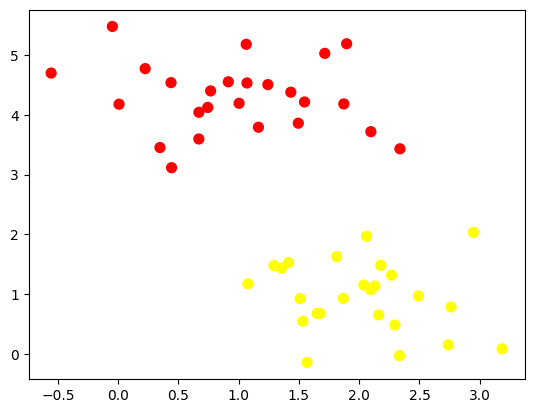

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

## Ilustrasi Margin

(-1.0, 3.5)

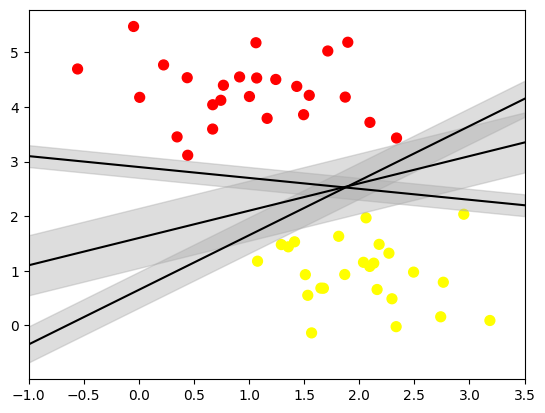

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

## Fitting Model

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

### Selanjutnya buat fungsi untuk membantu visualisasi hasil fit model.

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### Lakukan plotting dengan fungsi yang telah dibuat.

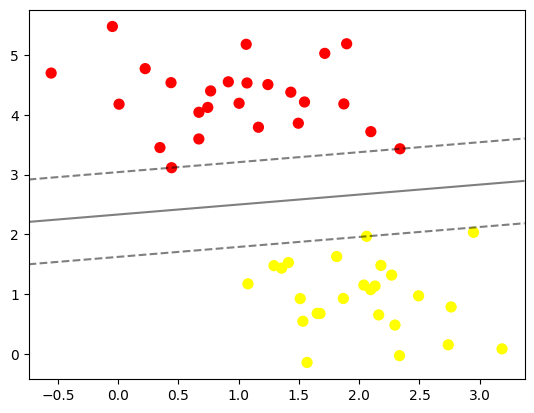

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

### Beberapa titik data yang menyentuh (masuk ke area) garis disebut sebagai support vector. Untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

In [ ]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

### Hasil fitting merupakan kunci keberhasilan suatu classifier (yang hanya dilihat dari posisi dari support vector). Data-data lain yang berada jauh dari margin dan tetap berada di area yang tepat tidak memiliki kemampuan untuk memodifikasi fitting (karena bukan support vector). Data-data tersebut tidak berkontribusi terhadap loss function yang digunakan untuk fitting model. Untuk lebih memahami hal ini, 60 dan 120 data awal digunakan sebagai contoh dalam bentuk perbandingan.

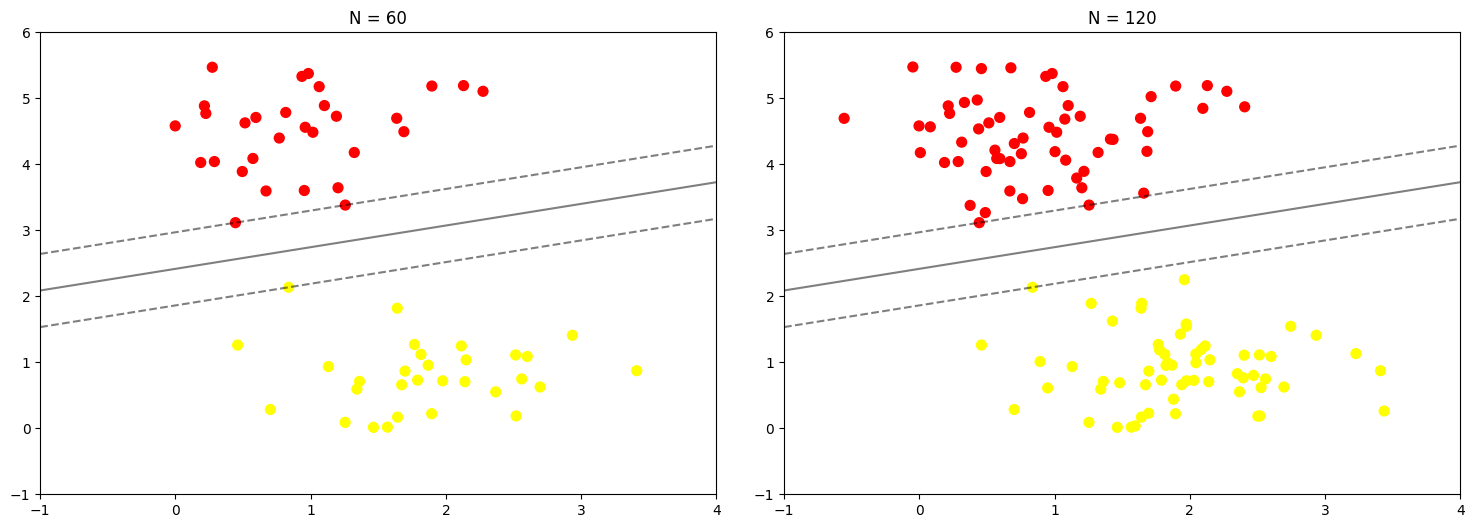

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

# Praktikum 2

## Ilustrasi Data Non-Linier

### Import Library



In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC

### Buat Kembali Fungsi Plotting

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### Buat Data Dummy Non-Linier

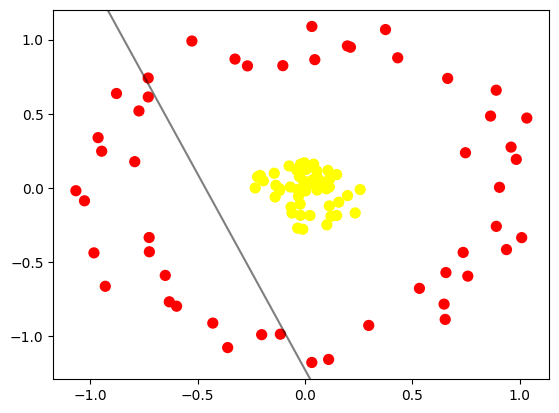

In [ ]:
# contoh data tidak terpisah secara linier
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Berdasarkan contoh data di atas, tidak ditemukan sebuah garis pemisah linier yang mampu berperan sebagai pemisah data. Oleh karena itu, proyeksi (sudut pandang) lain terhadap data diperlukan supaya data dapat terpisahkan dengan jelas. Pada kegiatan ini, proyeksi yang digunakan adalah proyeksi berbasis radial.

r=np.exp(−(X∗∗2).sum(1))

Karena proyeksi radial tidak cukup menggunakan model 2D, maka plot visualisasi diubah menjadi model 3D.



## Fitting Model

Walaupun data dapat ditampilkan secara terpisah. Proyeksi titik data sejumlah N ke dalan suatu dimensi N menyebabkan beban komputasi juga bertambah. Untuk mengatasi hal ini, kernel radial basis function (RBF) pada Scikit-Learn digunakan.

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

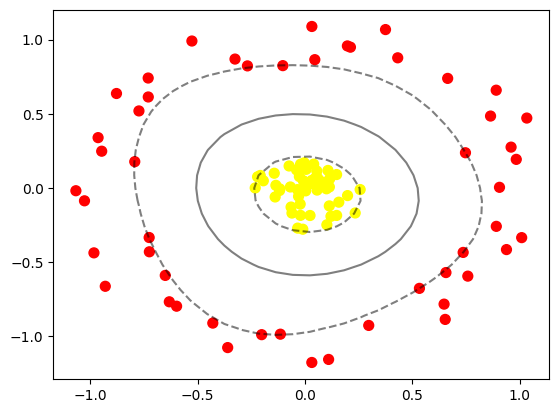

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

# Praktikum 3

##  Import Library dan Buat Fungsi Plotting

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

## Buat Data Dummy

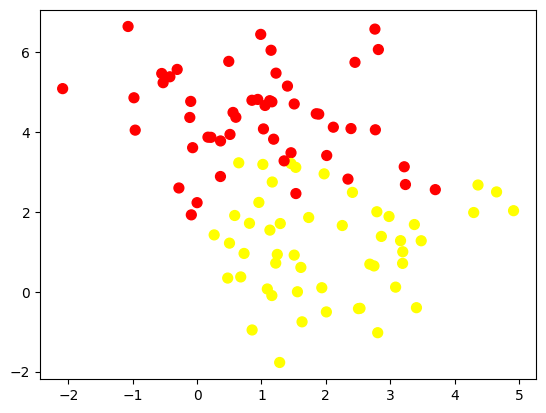

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

## Analisis Dampak Tunning

Untuk mengatasi hal ini, teknik penghalusan margin pada SVM dapat diterapkan. Teknik ini berfungsi untuk memasukkan beberapa titik data ke dalam margin supaya menghasilkan fitting yang lebih baik. Penebalan margin dari hasil teknik penghalusan dikelola oleh sebuah parameter tuning (dikenal sebagai C). Contoh dibawah menunjukkan perubahan pada C berdampak pada hasil fitting final.

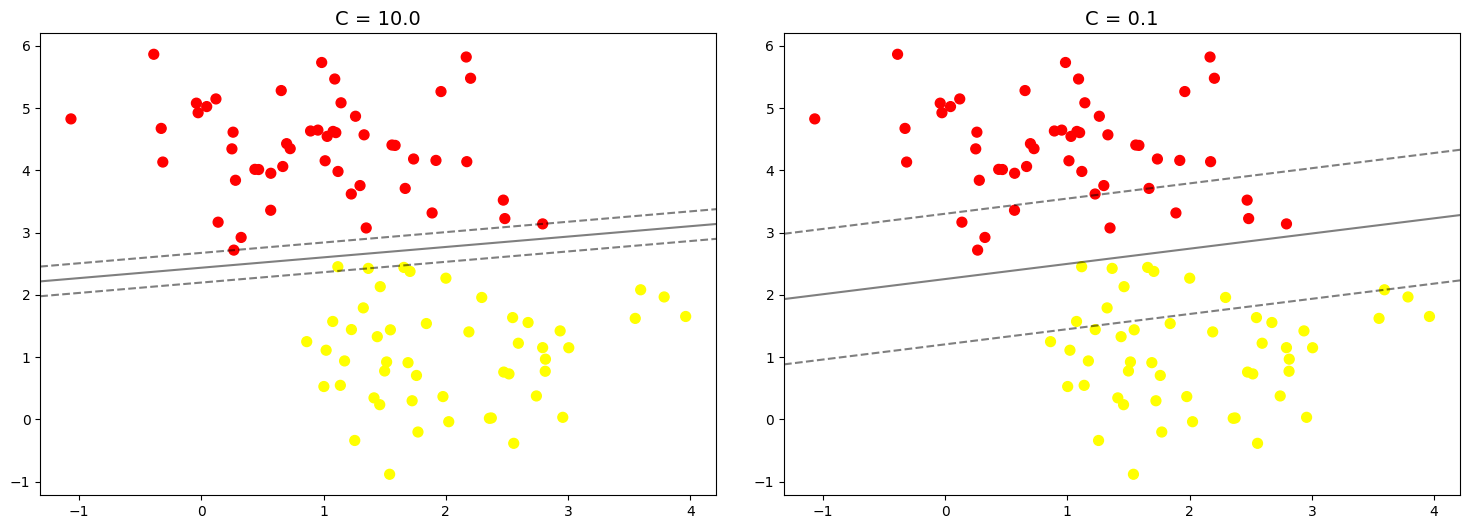

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

# Praktikum 4

## Unduh Dataset

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


## Inspreksi Citra Wajah

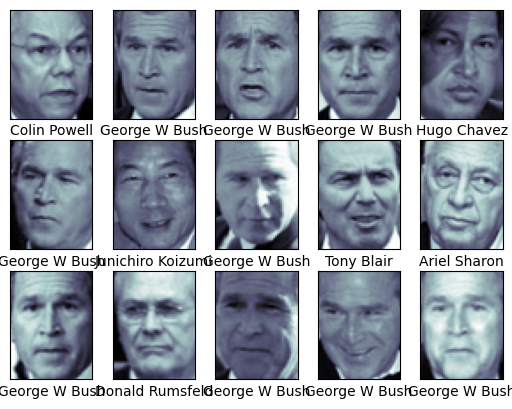

In [ ]:
# contoh wajah yang digunakan
from matplotlib import pyplot as plt

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

## Pra Pengolahan Data

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')

# Pipeline digunakan untuk melakukan proses secara bertahap dalam
# 1 eksekusi fungsi secara langsung
model = make_pipeline(pca, svc)

## Split Data

In [ ]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

## Pembuatan Model + Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 1min 46s, sys: 146 ms, total: 1min 46s
Wall time: 1min 20s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


In [ ]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

## Cek Hasil Prediksi

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

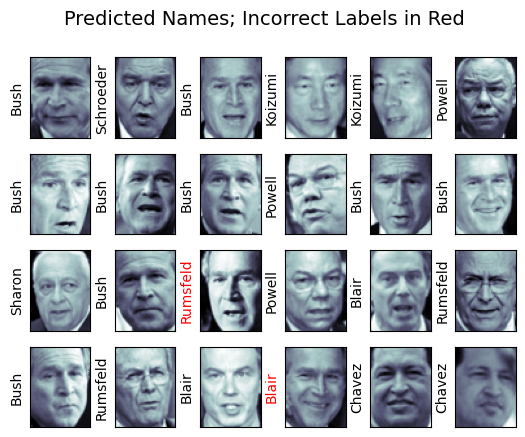

In [ ]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

## Cek Performansi

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Dari tabel tersebut, kita mendapatkan informasi terkait dengan akurasi keseluruhan, presisi, recall, dan f1-score untuk setiap label. Selanjutnya, kita dapat menggunakan confusion matrix untuk mengetahui label label yang terklasifikasi  dengan benar dan tidak.

Text(113.92222222222219, 0.5, 'predicted label')

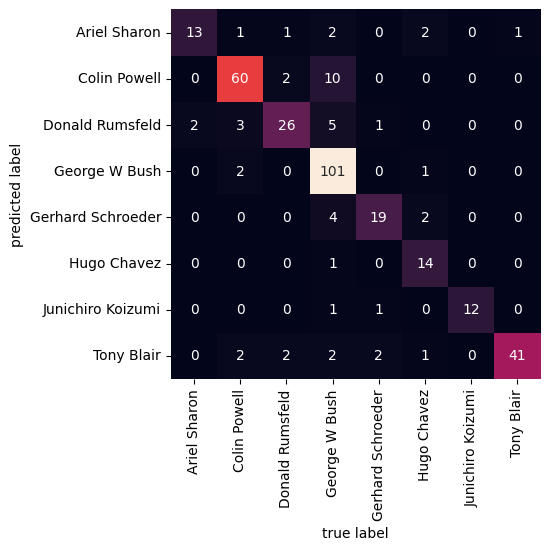

In [ ]:
# bentuk confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

# Praktikum 5

## Import Library

In [5]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [6]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Lakukan ekstraksi data gambar, kemudian definisikan lokasi gambar. Pada contoh ini, folder gambar berlokasi sama dengan lokasi file python.

In [7]:
# Image directories
train_dir = '/content/drive/MyDrive/ML /images/training'
test_dir = '/content/drive/MyDrive/ML /images/test'

## Load Data dan Visualisasi

In [8]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

Load gambar training

In [9]:
# Load training data
train_img = load_dataset(train_dir)

Lakukan pengecekan pada salah satu data pada list. List harus berisi tuple dengan dua data, yaitu data gambar dan label dari gambar.

In [10]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[3, 4, 8],
         [4, 5, 9],
         [4, 5, 9],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],
 
        [[2, 3, 7],
         [3, 4, 8],
         [3, 4, 8],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],
 
        [[1, 2, 4],
         [2, 3, 5],
         [3, 4, 6],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],
 
        ...,
 
        [[2, 4, 3],
         [3, 5, 4],
         [4, 6, 5],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[1, 3, 2],
         [2, 4, 3],
         [3, 5, 4],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 2, 1],
         [1, 3, 2],
         [2, 4, 3],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 'night')

In [ ]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 123
(372, 640, 3)


In [11]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Shape	: (458, 800, 3)
Label	: day


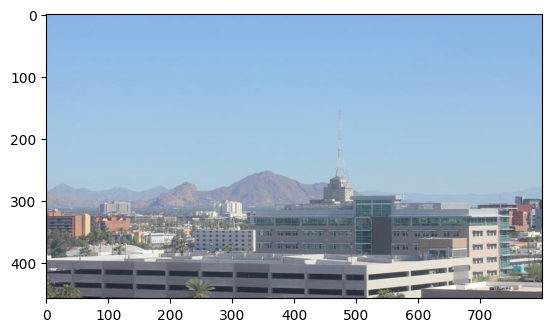

In [12]:
random_img_viz(train_img)

## Pra Pengolahan Data

In [13]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

In [14]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

In [15]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

In [16]:
train_std_img_list = preprocess(train_img)

In [17]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 97
(600, 1100, 3)


## Ekstraksi Fitur

In [18]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Image 37
Avg Brighness: 13.7507


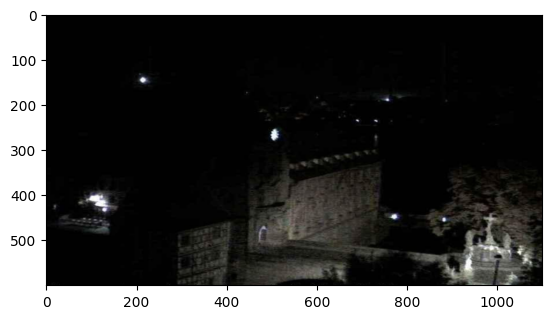

In [19]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

## Klasifikasi dengan Metode Threshold

In [21]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

Image 166
Actual label: 1
Predicted label: 0


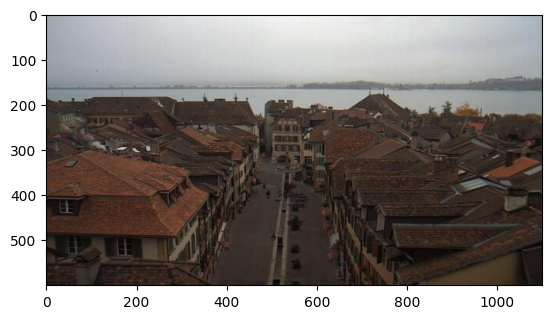

In [22]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

## EValuasi Manual

In [23]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

In [24]:
# Evaluate on train data dengan batas 120
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


# Tugas Praktikum


1. Buatlah model SVM dengan menggunakan data voice.csv dengan ketentuan,
   a. Split data dengan rasio 70:30 dan 80:20 untuk setiap model yang akan dibangun.

    i. Gunakan model dengan kernel linier.
    ii. Gunakan model dengan kernel polynomial.
    iii. Gunakan model dengan kernel RBF.

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from google.colab import files


# =====================================
# 1. Load dataset dan preprocessing
# =====================================

uploaded = files.upload()
df = pd.read_csv('voice.csv')  # sesuaikan path file

# Encode label (male/female -> 0/1)
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

X = df.drop('label', axis=1)
y = df['label']

# Standardisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# =====================================
# 2. Training dan Evaluasi Model SVM
# =====================================
splits = [(0.7, 0.3), (0.8, 0.2)]
kernels = {
    'Linear Kernel': 'linear',
    'Polynomial Kernel': 'poly',
    'RBF Kernel': 'rbf'
}

results = []

for train_size, _ in splits:
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, train_size=train_size, random_state=42
    )

    for model_name, kernel in kernels.items():
        model = SVC(kernel=kernel, random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)

        results.append([
            f"{int(train_size*100)}:{int((1-train_size)*100)}",
            model_name,
            round(acc, 4)
        ])

# =====================================
# 3. Menampilkan hasil dalam bentuk tabel
# =====================================
results_df = pd.DataFrame(results, columns=['Train-Test Split', 'Model', 'Accuracy'])
print("\n=== Tabel Akurasi Model SVM ===\n")
print(results_df)


Saving voice.csv to voice.csv

=== Tabel Akurasi Model SVM ===

  Train-Test Split              Model  Accuracy
0            70:30      Linear Kernel    0.9706
1            70:30  Polynomial Kernel    0.9569
2            70:30         RBF Kernel    0.9811
3            80:19      Linear Kernel    0.9763
4            80:19  Polynomial Kernel    0.9685
5            80:19         RBF Kernel    0.9826


b. Tabulasikan performansi setiap split dan kernel berdasarkan metrik akurasi.

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv('voice.csv')  # sesuaikan path jika berbeda

# Encode label (male/female -> 0/1)
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

# Pisahkan fitur dan label
X = df.drop('label', axis=1)
y = df['label']

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Daftar rasio split dan kernel yang digunakan
splits = [(0.7, 0.3), (0.8, 0.2)]
kernels = ["linear", "poly", "rbf"]

hasil = []

# Melakukan pelatihan dan evaluasi untuk setiap kombinasi
for train_size, test_size in splits:
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, train_size=train_size, random_state=42
    )

    for kernel in kernels:
        model = SVC(kernel=kernel, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        akurasi = accuracy_score(y_test, y_pred)

        hasil.append([
            f"{int(train_size*100)}:{int(test_size*100)}",
            kernel,
            round(akurasi, 4)
        ])

# Tabulasi hasil
hasil_df = pd.DataFrame(hasil, columns=["Train-Test Split", "Kernel", "Accuracy"])
print("\n=== Tabel Akurasi SVM ===\n")
print(hasil_df)



=== Tabel Akurasi SVM ===

  Train-Test Split  Kernel  Accuracy
0            70:30  linear    0.9706
1            70:30    poly    0.9569
2            70:30     rbf    0.9811
3            80:20  linear    0.9763
4            80:20    poly    0.9685
5            80:20     rbf    0.9826


2. Gunakan data pada praktikum 5 untuk membuat model klasifikasi siang dan malam menggunakan SVM dengan kernel RBF menggunakan fitur histrogram. Gunakan rasio 80:20. Anda dapat bereksperimen dengan hyperparameter tunning dari kernel RBF. Catat performansi akurasinya!



In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# --- DEFINISI PATH ---
# Based on Praktikum 5, your training images are in this directory.
# The subfolders for classification should be 'day' and 'night'.
data_dir = "/content/drive/MyDrive/ML /images/training"


# =========================================
# 1. Ekstraksi Fitur Histogram
# =========================================

def extract_histogram(image_path):
    # Pastikan file gambar ada
    if not os.path.exists(image_path):
        # This should ideally be caught by os.listdir not returning the file
        return None

    img = cv2.imread(image_path)
    # Check if image was loaded successfully (e.g., if file is corrupt or path is wrong)
    if img is None:
        print(f"Warning: Could not load image at {image_path}. Skipping.")
        return None

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Histogram 8 bins per channel (RGB), total features 8 * 3 = 24
    hist_r = cv2.calcHist([img], [0], None, [8], [0, 256]).flatten()
    hist_g = cv2.calcHist([img], [1], None, [8], [0, 256]).flatten()
    hist_b = cv2.calcHist([img], [2], None, [8], [0, 256]).flatten()

    return np.concatenate([hist_r, hist_g, hist_b])

X = [] # Fitur
y = [] # Label

print("Memulai proses ekstraksi fitur...")
# Assume subfolders are named 'day' and 'night' based on Praktikum 5
# Label 0 for 'night', 1 for 'day' to align with label_encoder logic
folder_mappings = {"night": 0, "day": 1}

for folder_name, label_value in folder_mappings.items():
    folder_path = os.path.join(data_dir, folder_name)

    # Check if the classification folder (e.g., 'day' or 'night') exists
    if not os.path.isdir(folder_path):
        print(f"!!! Peringatan: Direktori '{folder_path}' tidak ditemukan. Lewati folder ini.")
        continue # Skip folder if it does not exist

    for file in os.listdir(folder_path):
        if file.lower().endswith(('.jpg', '.png', '.jpeg')): # Process only image files
            img_path = os.path.join(folder_path, file)
            features = extract_histogram(img_path)

            if features is not None:
                X.append(features)
                y.append(label_value)

X = np.array(X)
y = np.array(y)

print(f"Ekstraksi selesai. Total sampel: {len(X)}")

if len(X) == 0:
    print("!!! Gagal melatih model: Tidak ada data yang berhasil dimuat. Cek kembali path dan isi folder serta nama folder.")
    exit() # Stop execution if no data was loaded

# =========================================
# 2. Standardisasi Fitur
# =========================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Fitur berhasil distandardisasi.")

# =========================================
# 3. Split Data 80:20
# =========================================
# Stratify=y ensures class ratios (day/night) are maintained in train and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Data dibagi: Train ({len(X_train)}), Test ({len(X_test)})")

# =========================================
# 4. SVM RBF + Hyperparameter Tuning (GridSearchCV)
# =========================================
param_grid = {
    # C: Trade-off between a wide margin and correct classification
    "C": [0.1, 1, 10, 100],
    # gamma: Determines the influence of a single training sample. Small: far influence, Large: close influence
    "gamma": ["scale", 0.01, 0.001]
}

print("Memulai Hyperparameter Tuning (Grid Search 5-fold CV)...")
svm_rbf = GridSearchCV(SVC(kernel='rbf', random_state=42), param_grid, cv=5, verbose=2)
svm_rbf.fit(X_train, y_train)

# =========================================
# 5. Evaluasi Model
# =========================================
y_pred = svm_rbf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("\n" + "="*40)
print("=== HASIL EVALUASI MODEL SVM RBF ===")
print(f"Akurasi pada Test Set (Rasio 80:20): {round(accuracy * 100, 2)}%")
print(f"Parameter Terbaik (C, gamma): {svm_rbf.best_params_}")
print("="*40)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Memulai proses ekstraksi fitur...
Ekstraksi selesai. Total sampel: 240
Fitur berhasil distandardisasi.
Data dibagi: Train (192), Test (48)
Memulai Hyperparameter Tuning (Grid Search 5-fold CV)...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .................................C=0.1, gamma=scale; total time=   0.0s
[CV] END .................................C=0.1, gamma=scale; total time=   0.0s
[CV] END .................................C=0.1, gamma=scale; total time=   0.0s
[CV] END .................................C=0.1, gamma=scale; total time=   0.0s
[CV] END .................................C=0.1, gamma=scale; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.